In [5]:
import os
import torch
import numpy as np
import random
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

from utils.utils_data import create_distortions_batch, distort_images, resize_crop, map_distortion_values

In [6]:
random_seed = 42  # You can choose any integer value
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

In [ ]:
folder_path = "images"
files = [f for f in os.listdir(folder_path) if not f.startswith('.') and '__' not in f]

with tqdm(total=len(files), desc="Images to Distort") as pbar:
    for i, f in enumerate(files):
        img_path = os.path.join(folder_path, f)
        create_distortions_batch(img_path, folder_path, batch_size=32, counter=i)
        pbar.update(1)
        if i == 0:
            break

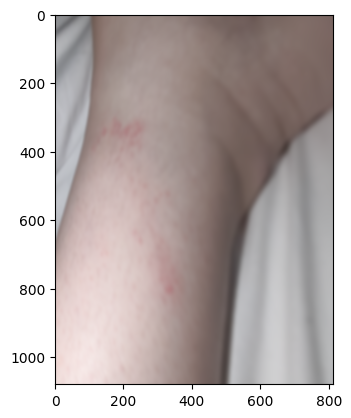

Distortions: ['brighten', 'gaussian_blur', 'perspective_left', 'color_saturation1']
Values: [0.2, 5, 0.4, 0.4]
Mapped Values: [0.25, 1.0, 0.5, 0.5]


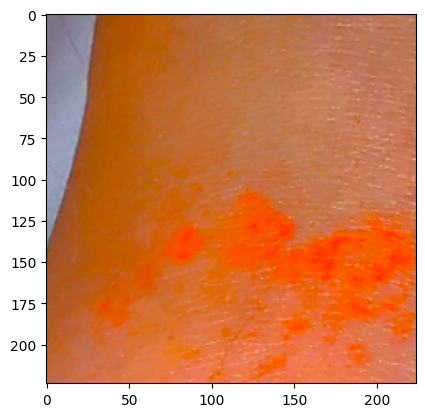

Distortions: ['brighten', 'motion_blur', 'perspective_top', 'color_saturation2']
Values: [0.0, 0, 0.0, 3]
Mapped Values: [0.0, 0.0, 0.0, 0.75]


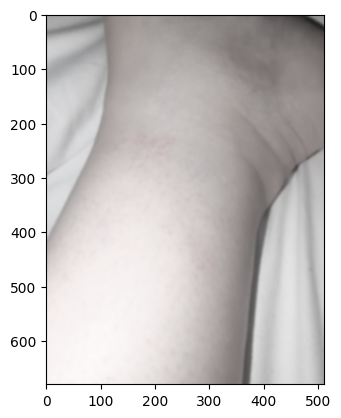

Distortions: ['brighten', 'gaussian_blur', 'perspective_top', 'color_saturation1']
Values: [0.4, 2, 0.0, 0.8]
Mapped Values: [0.5, 0.5, 0.0, 1.0]


In [7]:
folder_path = "images"
files = [f for f in os.listdir(folder_path) if not f.startswith('.') and '__' not in f]

#with tqdm(total=len(files), desc="Images to Distort") as pbar:
for i, f in enumerate(files):
    img_path = os.path.join(folder_path, f)
    orig_image = Image.open(img_path).convert('RGB')
    tensor_img = transforms.ToTensor()(orig_image)
    img_A_orig, distort_functions, distort_values = distort_images(tensor_img)
    mapped_values = map_distortion_values(distort_functions, distort_values)

    plt.imshow(img_A_orig.permute(1, 2, 0)), plt.axis('on'), plt.show()
    distort_functions = [f.__name__ for f in distort_functions]
    print(f"Distortions: {distort_functions}")
    print(f"Values: {distort_values}")
    print(f"Mapped Values: {mapped_values}")

    img_crop = resize_crop(orig_image, 224)
    tensor_img = transforms.ToTensor()(img_crop)
    img_A_orig, distort_functions, distort_values = distort_images(tensor_img)
    mapped_values = map_distortion_values(distort_functions, distort_values)
    plt.imshow(img_A_orig.permute(1, 2, 0)), plt.axis('on'), plt.show()
    distort_functions = [f.__name__ for f in distort_functions]
    print(f"Distortions: {distort_functions}")
    print(f"Values: {distort_values}")
    print(f"Mapped Values: {mapped_values}")

    img = Image.open(img_path).convert('RGB')
    width, height = img.size
    aspect_ratio = width / height
    if width < height:
        new_width = 512
        new_height = int(512 / aspect_ratio)
    else:
        new_height = 512
        new_width = int(512 * aspect_ratio)
    img = img.resize((new_width, new_height), Image.BICUBIC)
    tensor_img = transforms.ToTensor()(img)
    img_A_orig, distort_functions, distort_values = distort_images(tensor_img)
    mapped_values = map_distortion_values(distort_functions, distort_values)
    plt.imshow(img_A_orig.permute(1, 2, 0)), plt.axis('on'), plt.show()
    distort_functions = [f.__name__ for f in distort_functions]
    print(f"Distortions: {distort_functions}")
    print(f"Values: {distort_values}")
    print(f"Mapped Values: {mapped_values}")
    #pbar.update(1)
    if i == 0:
        break

In [7]:
from data import GQIDataset
import matplotlib.pyplot as plt

df = GQIDataset(root='temp', crop=False, normalize=False)

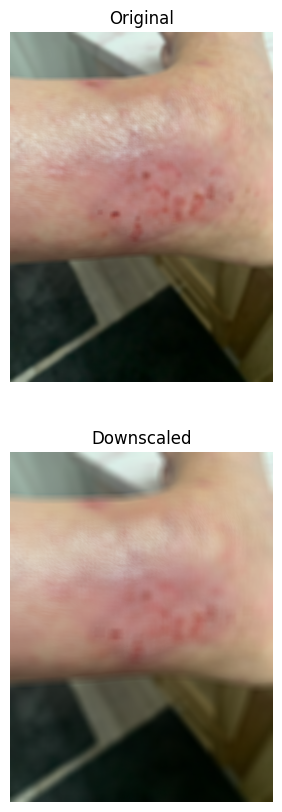

Distortions: [0.0, 0.75, 0.0, 0.0]


In [8]:
index = 2
sample = df[index]

plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.imshow(sample["img"].permute(1, 2, 0).clip(0, 1))
plt.axis("off")
plt.title(f"Original")

plt.subplot(2,1,2)
plt.imshow(sample["img_ds"].permute(1, 2, 0).clip(0, 1))
plt.axis("off")
plt.title(f"Downscaled")

plt.show()

print(f"Distortions: {sample['label']}")

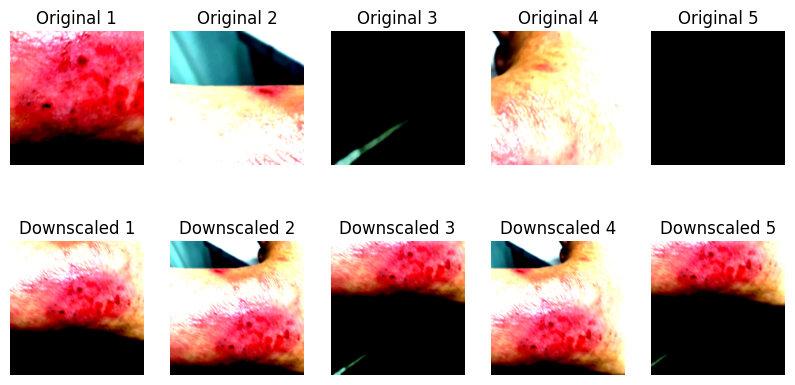

Distortions: [0.0, 0.5, 0.0, 0.0]


In [4]:
index = 2
sample = df[index]

plt.figure(figsize=(10, 5))
for i in range(len(sample["img"])):
    plt.subplot(2, len(sample["img"]), i + 1)
    plt.imshow(sample["img"][i].permute(1, 2, 0).clip(0, 1))
    plt.axis("off")
    plt.title(f"Original {i + 1}")

    plt.subplot(2, len(sample["img"]), i + len(sample["img"]) + 1)
    plt.imshow(sample["img_ds"][i].permute(1, 2, 0).clip(0, 1))
    plt.axis("off")
    plt.title(f"Downscaled {i + 1}")

plt.show()

print(f"Distortions: {sample['label']}")

In [4]:
df[0]['img'].shape, df[0]['img_ds'].shape, df[0]['label']

(torch.Size([3, 512, 787]), torch.Size([3, 256, 393]), [0.0, 0.0, 0.5, 0.0])

In [ ]:
from utils.utils_data import resize_crop, center_corners_crop

folder_path = "images"
files = [f for f in os.listdir(folder_path) if not f.startswith('.') and '__' not in f]

# normal crop
test_path = os.path.join(folder_path, files[1])
transform = transforms.Compose([
    #transforms.Resize(256),                      # Resize the image to 256x256
    #transforms.CenterCrop(224),                  # Center crop the image to 224x224
    transforms.ToTensor(),                       # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])
orig_image = Image.open(test_path).convert('RGB')
image = transform(orig_image)
#image = transform(image).unsqueeze(0)

# center_corners_crop
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
img1 = Image.open(test_path).convert('RGB')
img1 = center_corners_crop(img1, crop_size=224)
img1 = [transforms.ToTensor()(crop) for crop in img1]
img1 = torch.stack(img1, dim=0)
im1g = normalize(img1)

# resize_crop
img2 = Image.open(test_path).convert('RGB')
img2 = resize_crop(img2, crop_size=224)
img2 = transforms.ToTensor()(img2)

In [ ]:
def display(orig_img, crop_img, distort_img):
    _, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create a figure with three subplots
    axes[0].imshow(orig_img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(crop_img.permute(1, 2, 0).cpu().numpy().clip(0, 1))
    axes[1].set_title('Normalized Image')
    axes[1].axis('off')
    axes[2].imshow(distort_img.permute(1, 2, 0).cpu().numpy())
    axes[2].set_title('Distorted Image')
    axes[2].axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap of subplots
    plt.show()
display(orig_image, image, img2)